## Check if the packages are installed and all function parameters

In [1]:
import importlib.util
import sys
import subprocess

def check_installation_and_install(package_name):
    spec = importlib.util.find_spec(package_name)
    if spec is None:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
    else:
        print(package_name + " is installed");

def save_cleaned_csv(dataframe,filename):
    os.makedirs("Cleaned_Data", exist_ok=True)  # Ensures directory exists
    dataframe.to_csv(f"Cleaned_Data/{filename}.csv")

check_installation_and_install("pandas")
check_installation_and_install("matplotlib")
check_installation_and_install("numpy")
check_installation_and_install("seaborn")
check_installation_and_install("scikit-learn")

pandas is installed
matplotlib is installed
numpy is installed
seaborn is installed


## Import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Insert Dataset to clean and preprocess

In [3]:
file_directory = "../dataset"

office_1_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part1.csv"))
office_2_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part2.csv"))
small_apartment_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part3.csv"))
small_workshop_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part4.csv"))
kitchen_livingroom_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part5.csv"))
bed_room_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part6.csv"))
boiler_room_df = pd.read_csv(os.path.join(file_directory,"uwb_dataset_part7.csv"))

df_array = [office_1_df,office_2_df,small_apartment_df,small_workshop_df,kitchen_livingroom_df,bed_room_df,boiler_room_df]

## Check the data description (1 statisfy as others contains the same type of data)

In [4]:
office_1_df.describe()

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
count,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.494667,3.826510,745.69750,8185.083667,11436.452833,9793.886500,72.221333,9842.208167,1317.649333,615.575500,...,257.887167,267.274833,248.486333,224.114167,239.009333,241.540000,253.234333,240.372500,254.194167,89.813333
std,0.500013,2.375949,4.90051,5384.003078,6235.459692,5362.053633,29.081334,4866.688927,580.461607,308.143783,...,151.244824,154.786864,131.708557,114.445401,128.869389,133.199023,175.999174,135.245002,146.977696,144.770797
min,0.000000,0.060000,712.00000,12.000000,208.000000,413.000000,28.000000,0.000000,412.000000,192.000000,...,3.000000,1.000000,2.000000,5.000000,2.000000,4.000000,4.000000,5.000000,5.000000,0.000000
25%,0.000000,1.810000,744.00000,3683.500000,5410.750000,4824.750000,56.000000,6843.000000,962.000000,317.000000,...,162.000000,161.750000,162.000000,146.000000,156.000000,156.000000,154.000000,151.000000,159.000000,0.000000
50%,0.000000,3.440000,746.00000,7117.000000,12299.000000,10285.500000,68.000000,9974.000000,1134.000000,509.000000,...,232.000000,244.000000,234.000000,216.000000,226.000000,230.000000,228.000000,222.000000,230.000000,0.000000
75%,1.000000,5.370000,748.00000,12334.500000,17341.250000,14414.000000,80.000000,12457.250000,1498.250000,1024.000000,...,311.000000,339.000000,301.000000,272.000000,288.250000,292.000000,296.000000,292.000000,310.000000,256.000000
max,1.000000,12.490000,838.00000,20456.000000,20624.000000,20399.000000,316.000000,31545.000000,5077.000000,1025.000000,...,1565.000000,1269.000000,1172.000000,1113.000000,1136.000000,1461.000000,2153.000000,1228.000000,1467.000000,1024.000000


## Removal of Unnecessary Columns

In [5]:
def clean_column(df_array, columns_to_drop):
    for i in range(len(df_array)):
        df_array[i] = df_array[i].drop(columns=columns_to_drop, axis=1)
    return df_array

clean_column(df_array,['CH','PREAM_LEN','BITRATE','PRFR'])
df_array[0].describe()

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
count,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.494667,3.826510,745.69750,8185.083667,11436.452833,9793.886500,72.221333,9842.208167,1317.649333,615.575500,...,257.887167,267.274833,248.486333,224.114167,239.009333,241.540000,253.234333,240.372500,254.194167,89.813333
std,0.500013,2.375949,4.90051,5384.003078,6235.459692,5362.053633,29.081334,4866.688927,580.461607,308.143783,...,151.244824,154.786864,131.708557,114.445401,128.869389,133.199023,175.999174,135.245002,146.977696,144.770797
min,0.000000,0.060000,712.00000,12.000000,208.000000,413.000000,28.000000,0.000000,412.000000,192.000000,...,3.000000,1.000000,2.000000,5.000000,2.000000,4.000000,4.000000,5.000000,5.000000,0.000000
25%,0.000000,1.810000,744.00000,3683.500000,5410.750000,4824.750000,56.000000,6843.000000,962.000000,317.000000,...,162.000000,161.750000,162.000000,146.000000,156.000000,156.000000,154.000000,151.000000,159.000000,0.000000
50%,0.000000,3.440000,746.00000,7117.000000,12299.000000,10285.500000,68.000000,9974.000000,1134.000000,509.000000,...,232.000000,244.000000,234.000000,216.000000,226.000000,230.000000,228.000000,222.000000,230.000000,0.000000
75%,1.000000,5.370000,748.00000,12334.500000,17341.250000,14414.000000,80.000000,12457.250000,1498.250000,1024.000000,...,311.000000,339.000000,301.000000,272.000000,288.250000,292.000000,296.000000,292.000000,310.000000,256.000000
max,1.000000,12.490000,838.00000,20456.000000,20624.000000,20399.000000,316.000000,31545.000000,5077.000000,1025.000000,...,1565.000000,1269.000000,1172.000000,1113.000000,1136.000000,1461.000000,2153.000000,1228.000000,1467.000000,1024.000000


## Feature Importance
After exploring with an list of numbers: 50,100,200.
Best Result is 50

In [6]:
# Dictionary to store top feature names per dataset
feature_list_names = {}

def explore_feature_random_forest(df_array, n_features):    
    global feature_list_names  # Ensure we update the global dictionary

    for idx, each_df in enumerate(df_array):
        # Separate features and target variable
        X = each_df.drop(columns=['NLOS'], errors='ignore')
        y = each_df['NLOS']
    
        # Train Random Forest for exploration
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X, y)
    
        # Get feature importance
        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
        feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
    
        # Store top 'n_features' in dictionary with dataset index as key
        feature_list_names[idx] = feature_importance.head(n_features)['Feature'].tolist()

        # Print results
        print(f"Dataset {idx} - Top {n_features} Important Features:")
        print(feature_importance.head(n_features))

# Example call
explore_feature_random_forest(df_array, 50)

Dataset 0 - Top 50 Important Features:
         Feature  Importance
8         RXPACC    0.076121
6        CIR_PWR    0.031913
4        FP_AMP3    0.028911
7      MAX_NOISE    0.026068
0          RANGE    0.022001
2        FP_AMP1    0.021683
3        FP_AMP2    0.020057
751       CIR741    0.011673
1         FP_IDX    0.008865
5    STDEV_NOISE    0.008329
754       CIR744    0.007808
752       CIR742    0.006723
749       CIR739    0.006708
592       CIR582    0.006534
608       CIR598    0.006308
750       CIR740    0.005496
256       CIR246    0.005328
761       CIR751    0.005217
584       CIR574    0.004561
753       CIR743    0.004551
760       CIR750    0.004387
96         CIR86    0.004149
712       CIR702    0.004067
759       CIR749    0.003979
762       CIR752    0.003511
758       CIR748    0.003397
433       CIR423    0.003361
589       CIR579    0.003334
480       CIR470    0.003268
536       CIR526    0.003213
757       CIR747    0.003197
600       CIR590    0.003098
664 

## Repopulate the df_array with the features required

In [7]:
def repopulate_array(df_array, feature_dict):
    df_filtered = []
    
    for idx, each_df in enumerate(df_array):
        if idx in feature_dict:
            selected_features = feature_dict[idx] + ['NLOS']  # Ensure 'NLOS' is included
            selected_features = each_df.columns.intersection(selected_features)  # Avoid KeyError
            df_filtered.append(each_df[selected_features])
        else:
            df_filtered.append(each_df)  # Keep unchanged if no feature list provided

    return df_filtered

df_filtered = repopulate_array(df_array,feature_list_names)

df_filtered[5].describe()

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR745,CIR746,CIR747,CIR748,CIR749,CIR750,CIR751,CIR752,CIR753,CIR755
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.497667,3.823280,745.665000,8140.216000,11485.743167,9783.714667,72.434667,9890.594000,1322.658833,612.394667,...,3865.930833,5074.800667,6060.943333,7172.229000,8184.102167,8848.806833,8949.544500,8465.268167,7804.531833,6429.973667
std,0.500036,2.372146,4.244618,5427.689987,6180.602217,5323.960522,30.120374,4897.162773,596.393576,306.446186,...,5111.285839,5699.565950,5720.845262,5726.123035,5553.612737,5282.115921,5316.290591,5272.176823,5096.623529,4511.325260
min,0.000000,0.050000,716.000000,12.000000,145.000000,187.000000,28.000000,0.000000,310.000000,153.000000,...,4.000000,3.000000,11.000000,16.000000,12.000000,78.000000,156.000000,8.000000,66.000000,22.000000
25%,0.000000,1.800000,744.000000,3582.750000,5500.000000,4809.250000,56.000000,6937.250000,962.000000,317.000000,...,240.000000,347.750000,943.000000,2243.750000,3563.750000,4468.750000,4508.500000,4104.750000,3653.750000,2911.250000
50%,0.000000,3.450000,746.000000,7140.000000,12408.000000,10320.500000,68.000000,9982.500000,1135.000000,503.000000,...,1229.500000,2778.000000,4297.500000,5810.000000,7053.000000,7886.500000,8100.000000,7411.000000,6668.500000,5306.000000
75%,1.000000,5.410000,748.000000,12406.250000,17286.250000,14206.250000,80.000000,12478.500000,1495.000000,1024.000000,...,5772.000000,8107.000000,9777.250000,11366.250000,12309.500000,12741.500000,13068.750000,12348.250000,11124.500000,8989.000000
max,1.000000,28.020000,819.000000,20572.000000,20579.000000,20326.000000,324.000000,36108.000000,5002.000000,1026.000000,...,23221.000000,23178.000000,23062.000000,23360.000000,23202.000000,23236.000000,23185.000000,23187.000000,23361.000000,23273.000000


## Check Any Missing Value

In [8]:
def check_missing_value(df_array):
    for i, df in enumerate(df_array, start=1):
        print(f"DataFrame {i} Missing Values:")
        print(df.isnull().sum().unique())
        print("-" * 30)

check_missing_value(df_filtered)

DataFrame 1 Missing Values:
[0]
------------------------------
DataFrame 2 Missing Values:
[0]
------------------------------
DataFrame 3 Missing Values:
[0]
------------------------------
DataFrame 4 Missing Values:
[0]
------------------------------
DataFrame 5 Missing Values:
[0]
------------------------------
DataFrame 6 Missing Values:
[0]
------------------------------
DataFrame 7 Missing Values:
[0]
------------------------------


## Check for any duplicated values

In [9]:
def check_duplicated_values(df_array):
      for i, df in enumerate(df_array, start=1):
        duplicate = df[df.duplicated()]

        if not duplicate.empty:
            print("Duplicate Rows :")
            print(duplicate)
            print("-" * 30)
        else:
            print("No duplicate rows found")
            print("-" * 30)

check_duplicated_values(df_filtered)

No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------
No duplicate rows found
------------------------------


## Checking Covariance (How Two Variables Vary Together)

In [10]:
dataset_names = [
    "Office 1", "Office 2", "Small Apartment", "Small Workshop",
    "Kitchen Living Room", "Bedroom", "Boiler Room"
]

def get_covariance(df_array):
    for idx,df in enumerate(df_array):
        cov_matrix = df.cov()
        print(f"{dataset_names[idx]}")
        print(cov_matrix)
        print("-" * 30)

get_covariance(df_filtered)

Office 1
                    NLOS        RANGE        FP_IDX       FP_AMP1  \
NLOS            0.250013     0.549595     -0.684477 -1.203023e+03   
RANGE           0.549595     5.645135     -3.166990 -5.710526e+03   
FP_IDX         -0.684477    -3.166990     24.014996  7.382428e+03   
FP_AMP1     -1203.023058 -5710.525726   7382.427880  2.898749e+07   
FP_AMP2     -1637.706453 -7161.218243  12275.355875  1.979772e+07   
FP_AMP3     -1385.948347 -5879.132697  10881.278213  1.302017e+07   
STDEV_NOISE     2.095530     5.392958     -2.625484 -8.365219e+03   
CIR_PWR      -946.102824 -3014.266145   6793.078650  9.022491e+06   
MAX_NOISE     -61.529125  -373.305648    305.932745  7.490556e+05   
RXPACC        113.243860   468.778300   -512.875057 -8.704059e+05   
CIR86          17.381319    62.186682    -43.428301 -1.207373e+05   
CIR158         16.371491    59.292296    -41.542813 -1.191605e+05   
CIR169         10.131928    46.692110    -41.539538 -7.713378e+04   
CIR198         16.836233 

## Checking Correlation (Strength & Direction of Relationships)

In [11]:
def get_correlation(df_array):
    for idx,df in enumerate(df_array):
        corr_matrix = df.corr()
        print(f"{dataset_names[idx]}")
        print(corr_matrix)
        print("-" * 30)

get_correlation(df_filtered)

Office 1
                 NLOS     RANGE    FP_IDX   FP_AMP1   FP_AMP2   FP_AMP3  \
NLOS         1.000000  0.462619 -0.279342 -0.446876 -0.525274 -0.516933   
RANGE        0.462619  1.000000 -0.272000 -0.446410 -0.483372 -0.461472   
FP_IDX      -0.279342 -0.272000  1.000000  0.279803  0.401721  0.414102   
FP_AMP1     -0.446876 -0.446410  0.279803  1.000000  0.589714  0.451004   
FP_AMP2     -0.525274 -0.483372  0.401721  0.589714  1.000000  0.884499   
FP_AMP3     -0.516933 -0.461472  0.414102  0.451004  0.884499  1.000000   
STDEV_NOISE  0.144111  0.078050 -0.018423 -0.053427 -0.094101 -0.084835   
CIR_PWR     -0.388797 -0.260682  0.284834  0.344340  0.378462  0.379541   
MAX_NOISE   -0.211995 -0.270679  0.107550  0.239682  0.207322  0.189193   
RXPACC       0.734987  0.640290 -0.339638 -0.524642 -0.628373 -0.597426   
CIR86        0.264197  0.198924 -0.067353 -0.170437 -0.204258 -0.190165   
CIR158       0.250258  0.190740 -0.064794 -0.169164 -0.202044 -0.189964   
CIR169       0.1

## Check for Outliers

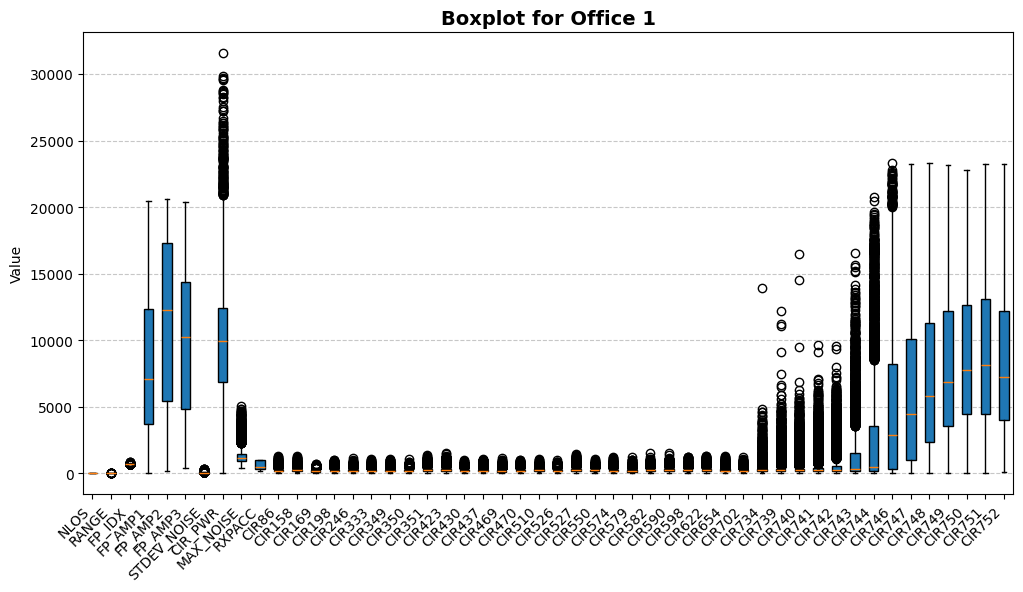

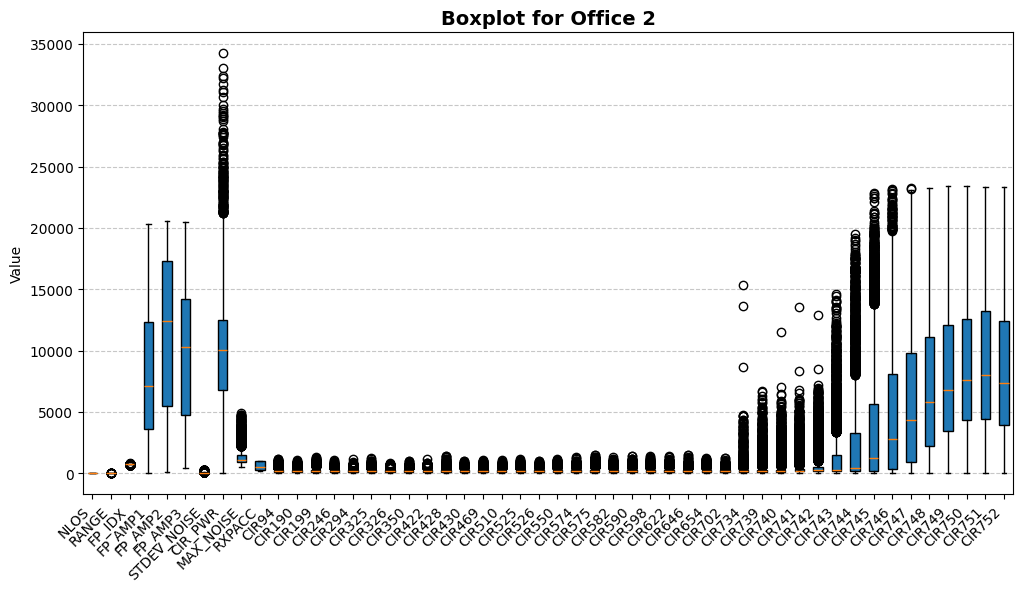

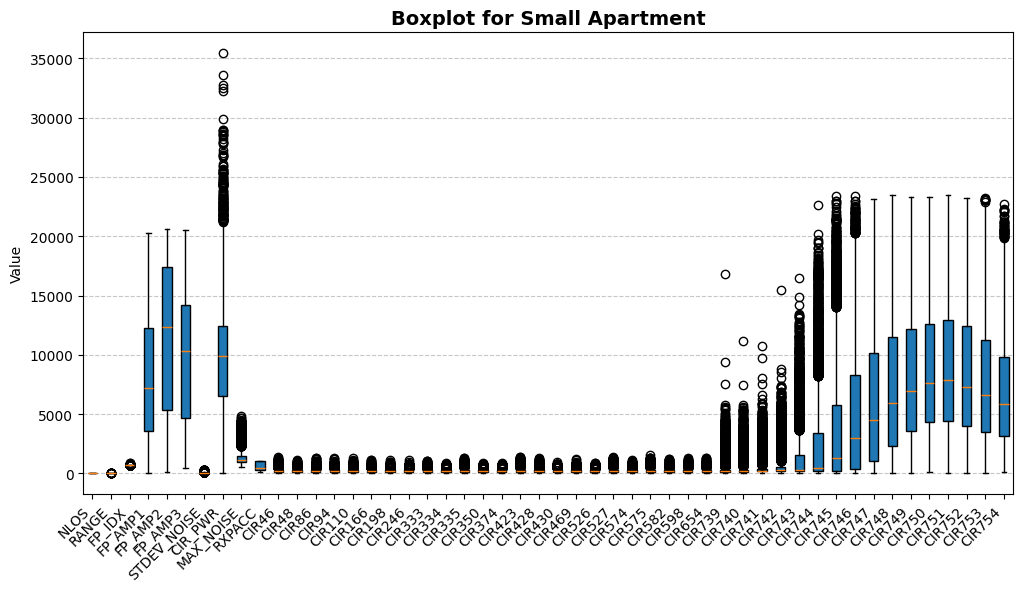

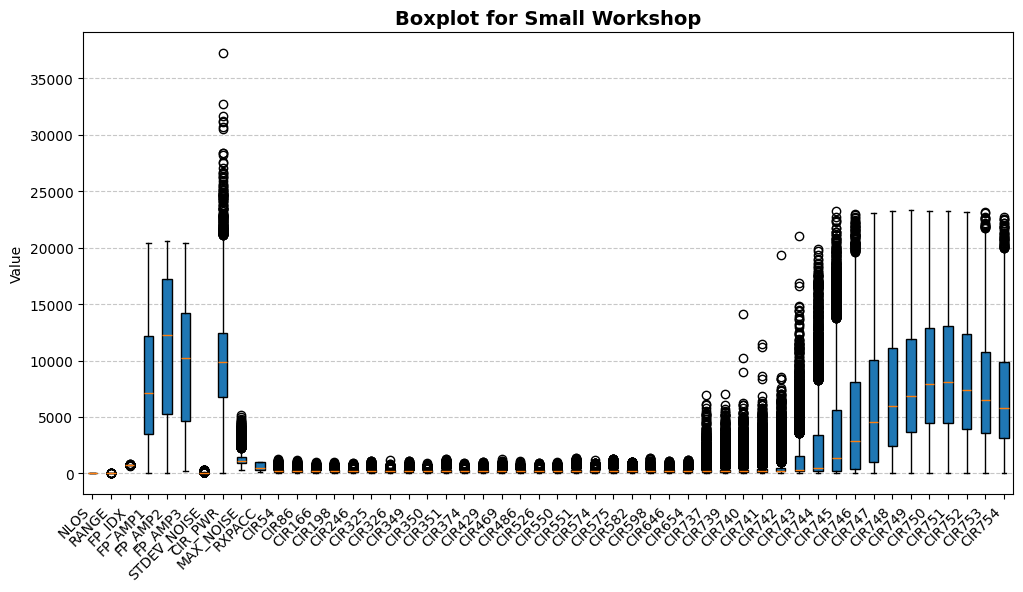

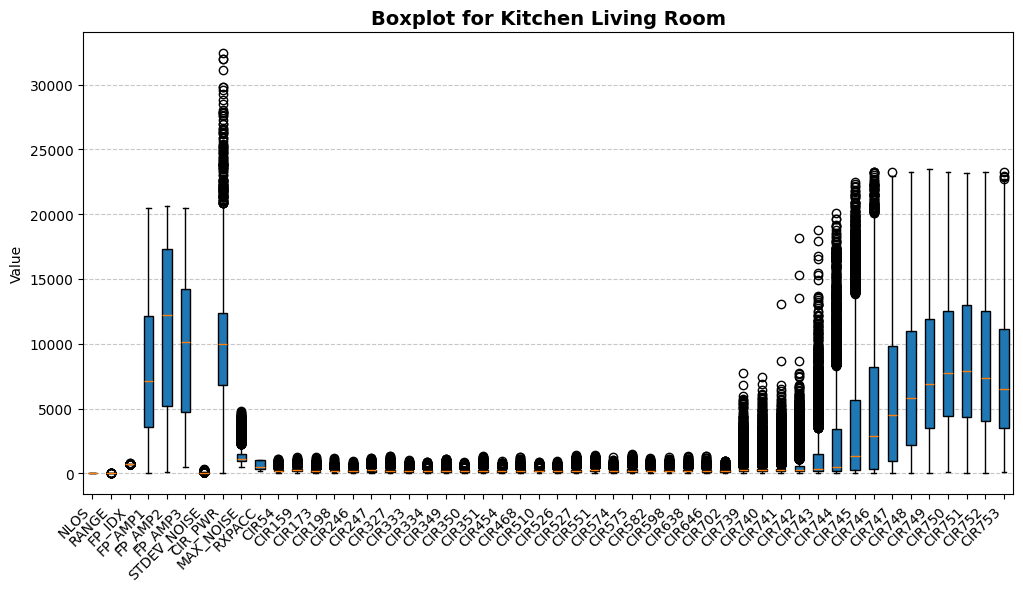

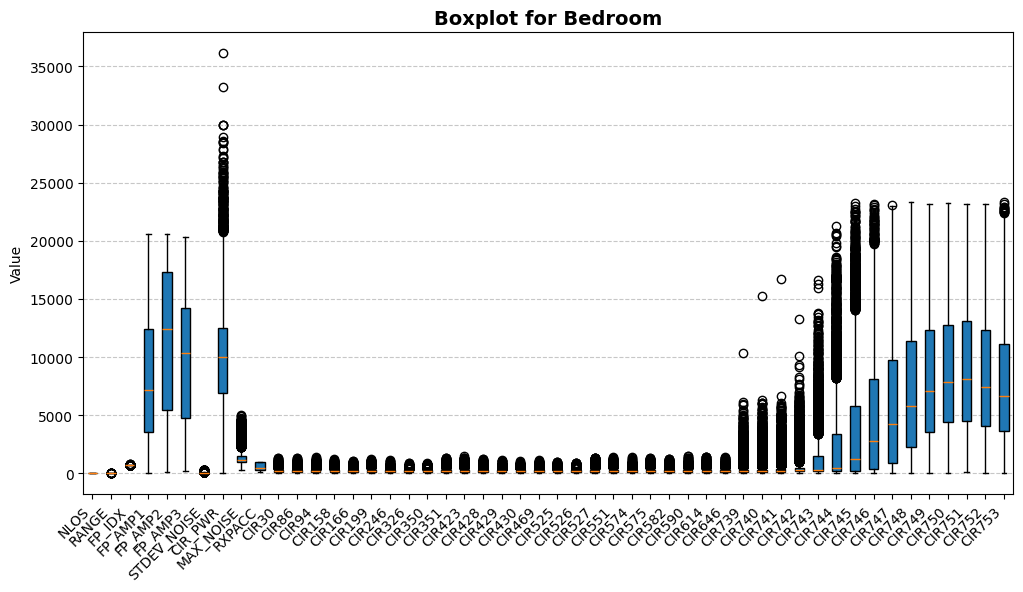

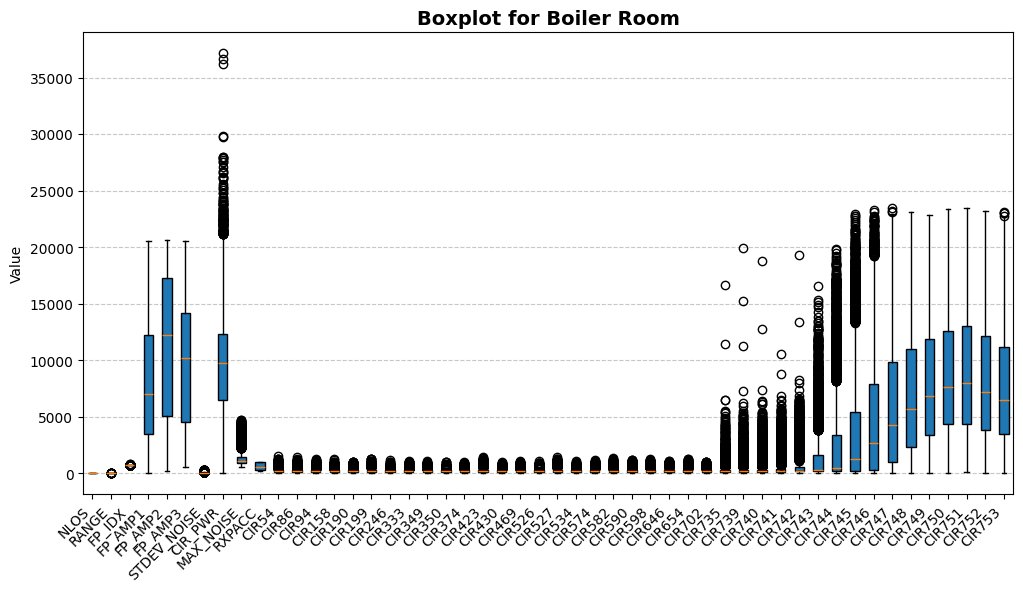

In [12]:
# columns_to_check = [
#     "RANGE", "FP_IDX", "FP_AMP1", "FP_AMP2", "FP_AMP3",
#     "STDEV_NOISE", "CIR_PWR", "MAX_NOISE", "RXPACC",
#     "FRAME_LEN"
# ]

for idx, df in enumerate(df_filtered): #Loop through each columns inside each df
    columns_to_check = df.columns[:-1] #Get all columns except the last column
    plt.figure(figsize=(12, 6)) #Create a 12x6 figure for the plot
    plt.boxplot(df[columns_to_check], vert=True, patch_artist=True) #Create a boxplot for columns 


    plt.xticks(range(1, len(columns_to_check) + 1), columns_to_check, rotation=45, ha="right") #Configuring x label
    plt.title(f"Boxplot for {dataset_names[idx]}", fontsize=14, fontweight="bold") #Add a title
    plt.ylabel("Value") #Add y label
    plt.grid(axis='y', linestyle='--', alpha=0.7) #Add grid to the plot

    plt.show()

## Remove Outliers

In [13]:
#Outliers are removed using Z Score
def calculate_mean(column):
    return sum(column) / len(column)

def calculate_std(column, mean):
    variance = sum((x - mean) ** 2 for x in column) / len(column) #Average Squared difference from the mean
    return variance ** 0.5 

def remove_outliers(df, columns, threshold=3):
    for col in columns:
        if col in df.columns:
            column_data = df[col].dropna().tolist() #Converting to list

            mean = calculate_mean(column_data) #Calculate mean for column
            std = calculate_std(column_data, mean) #Calculate STD for column

            #Filter rows where absolute Z score is less than threshold
            #Rows that has zScore greater or equal to threshold are removed as they will be considered outlier
            df = df[[abs((x - mean)/ std) < threshold if not pd.isna(x) else False for x in df[col]]] 
            
    return df

df_array = [remove_outliers(df, columns_to_check) for df in df_array]

for idx, df in enumerate(df_array):
    print(f"{dataset_names[idx]}:")
    print(f" - Rows after outlier removal: {df.shape[0]}\n")

Office 1:
 - Rows after outlier removal: 4140

Office 2:
 - Rows after outlier removal: 4168

Small Apartment:
 - Rows after outlier removal: 4149

Small Workshop:
 - Rows after outlier removal: 4103

Kitchen Living Room:
 - Rows after outlier removal: 4132

Bedroom:
 - Rows after outlier removal: 4133

Boiler Room:
 - Rows after outlier removal: 4119



## Check after outliners removal 

In [14]:
df_filtered[0].describe()

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR743,CIR744,CIR746,CIR747,CIR748,CIR749,CIR750,CIR751,CIR752,CIR754
count,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.494667,3.826510,745.69750,8185.083667,11436.452833,9793.886500,72.221333,9842.208167,1317.649333,615.575500,...,1373.055167,2572.081333,5118.102333,6233.399833,7194.834000,8055.801333,8743.696167,8972.965833,8403.949500,6939.989333
std,0.500013,2.375949,4.90051,5384.003078,6235.459692,5362.053633,29.081334,4866.688927,580.461607,308.143783,...,2186.524269,3879.377878,5675.454548,5862.089610,5750.916455,5468.543380,5219.034557,5314.455030,5363.826614,4765.083914
min,0.000000,0.060000,712.00000,12.000000,208.000000,413.000000,28.000000,0.000000,412.000000,192.000000,...,5.000000,7.000000,5.000000,5.000000,24.000000,7.000000,45.000000,47.000000,95.000000,61.000000
25%,0.000000,1.810000,744.00000,3683.500000,5410.750000,4824.750000,56.000000,6843.000000,962.000000,317.000000,...,202.000000,222.000000,353.000000,979.250000,2347.500000,3531.000000,4474.500000,4503.000000,3987.750000,3198.000000
50%,0.000000,3.440000,746.00000,7117.000000,12299.000000,10285.500000,68.000000,9974.000000,1134.000000,509.000000,...,326.500000,489.500000,2901.500000,4445.500000,5805.000000,6904.000000,7787.000000,8144.500000,7275.500000,5814.000000
75%,1.000000,5.370000,748.00000,12334.500000,17341.250000,14414.000000,80.000000,12457.250000,1498.250000,1024.000000,...,1555.750000,3550.250000,8203.250000,10128.500000,11286.000000,12213.250000,12682.000000,13123.750000,12204.750000,9771.000000
max,1.000000,12.490000,838.00000,20456.000000,20624.000000,20399.000000,316.000000,31545.000000,5077.000000,1025.000000,...,16536.000000,20775.000000,23292.000000,23282.000000,23350.000000,23204.000000,22770.000000,23213.000000,23266.000000,23252.000000


## Check valid data types 

In [15]:
def check_data_types(df_array):
    for idx, df in enumerate(df_array):
        print(f"{dataset_names[idx]}: {df.dtypes.unique()}")

check_data_types(df_filtered)

Office 1: [dtype('float64')]
Office 2: [dtype('float64')]
Small Apartment: [dtype('float64')]
Small Workshop: [dtype('float64')]
Kitchen Living Room: [dtype('float64')]
Bedroom: [dtype('float64')]
Boiler Room: [dtype('float64')]


## Do Principal Component Analysis 


Office 1

Transformed DataFrame after PCA:
              RANGE        FP_IDX       FP_AMP1       FP_AMP2       FP_AMP3  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean   8.368614e-17  1.117921e-14 -1.263187e-17 -7.500173e-17 -3.079019e-17   
std    1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00   
min   -1.591019e+00 -7.093237e+00 -1.517799e+00 -1.807283e+00 -1.737025e+00   
25%   -8.476081e-01 -3.544864e-01 -8.431802e-01 -9.594877e-01 -9.131404e-01   
50%   -1.573739e-01  6.668555e-02 -1.785128e-01  1.561429e-01  1.027853e-01   
75%    6.551669e-01  4.878575e-01  7.651609e-01  9.391721e-01  8.457442e-01   
max    3.684115e+00  1.775591e+01  2.249709e+00  1.446804e+00  1.989807e+00   

        STDEV_NOISE       CIR_PWR     MAX_NOISE        RXPACC         CIR86  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean   2.257947e-16 -1.310557e-16  1.452665e-16  1.768462e-16 -1.050024e-16   
std    

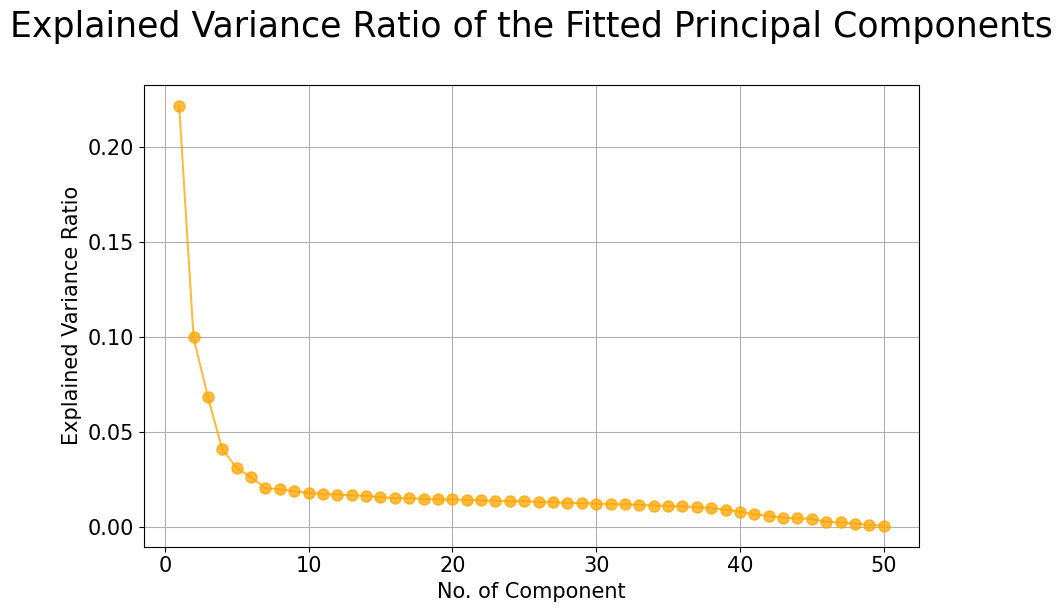


Office 2

Transformed DataFrame after PCA:
              RANGE        FP_IDX       FP_AMP1       FP_AMP2       FP_AMP3  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean  -1.430954e-16  1.528456e-15 -4.736952e-17  7.894919e-18 -1.417138e-16   
std    1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00   
min   -1.619162e+00 -7.700090e+00 -1.497496e+00 -1.822117e+00 -1.749167e+00   
25%   -8.507463e-01 -3.981767e-01 -8.344975e-01 -9.699574e-01 -9.485109e-01   
50%   -1.549031e-01  7.291445e-02 -1.896649e-01  1.435641e-01  1.089087e-01   
75%    6.732783e-01  5.440056e-01  7.615731e-01  9.419964e-01  8.453504e-01   
max    4.173839e+00  1.656111e+01  2.274091e+00  1.469020e+00  2.028751e+00   

        STDEV_NOISE       CIR_PWR     MAX_NOISE        RXPACC         CIR94  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean   1.531614e-16  1.484245e-16 -1.989520e-16  1.736882e-17 -2.526374e-17   
std    

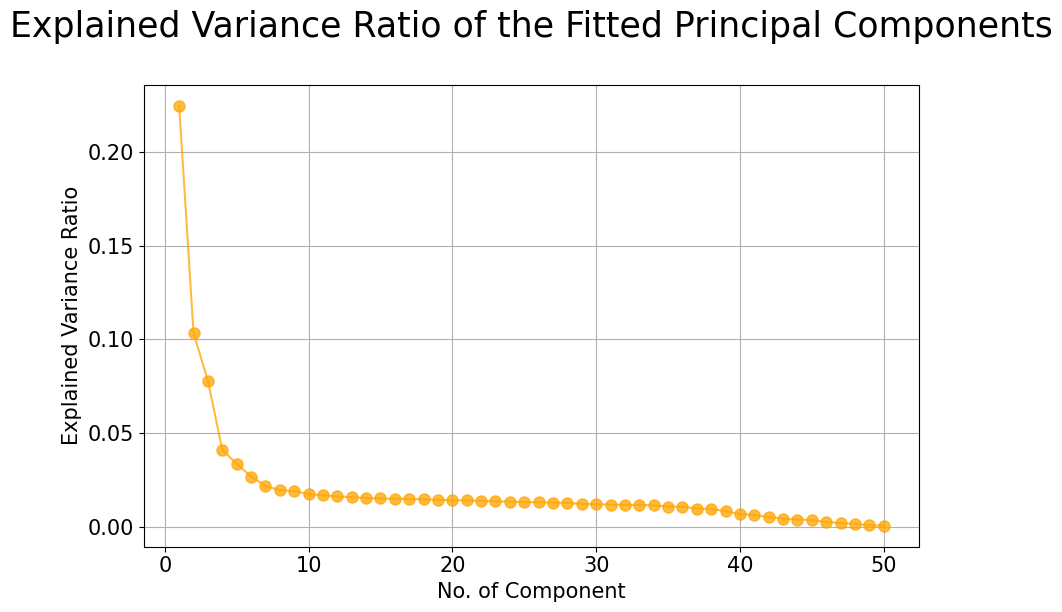


Small Apartment

Transformed DataFrame after PCA:
              RANGE        FP_IDX       FP_AMP1       FP_AMP2       FP_AMP3  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean  -1.136868e-16  2.227946e-15  1.357926e-16  6.000139e-17  1.476350e-16   
std    1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00   
min   -1.574318e+00 -6.775353e+00 -1.516344e+00 -1.837197e+00 -1.758039e+00   
25%   -8.529790e-01 -3.572281e-01 -8.555370e-01 -9.730353e-01 -9.368499e-01   
50%   -1.615174e-01  7.064691e-02 -1.586620e-01  1.653351e-01  1.189108e-01   
75%    6.665291e-01  4.985219e-01  7.500107e-01  9.326089e-01  8.404163e-01   
max    4.162251e+00  2.189227e+01  2.213361e+00  1.431584e+00  1.935053e+00   

        STDEV_NOISE       CIR_PWR     MAX_NOISE        RXPACC         CIR46  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean  -1.089499e-16  5.960664e-17 -2.210577e-17 -6.572520e-17  8.289665e-17   


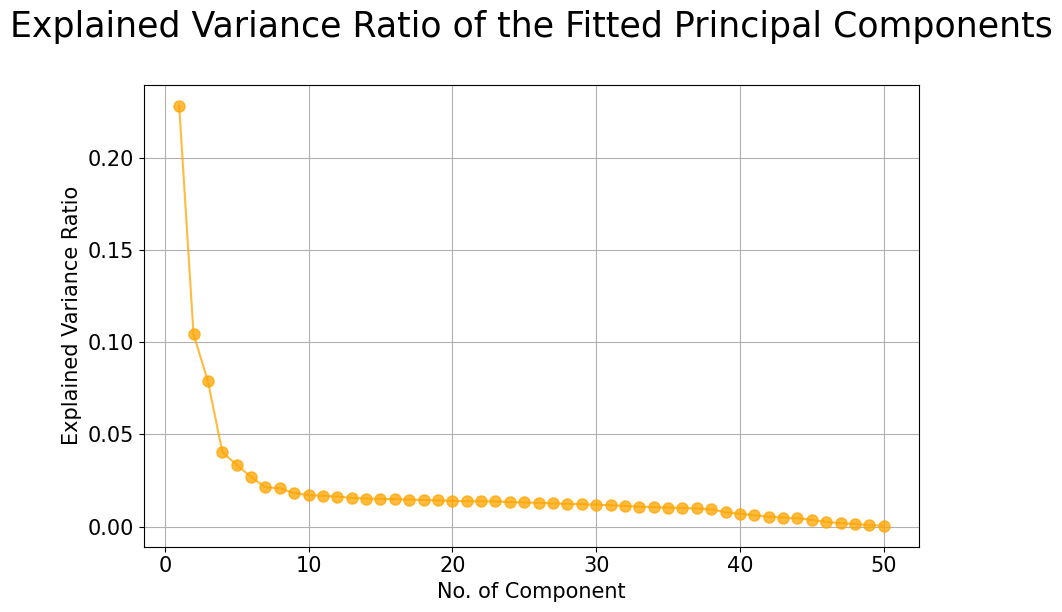


Small Workshop

Transformed DataFrame after PCA:
              RANGE        FP_IDX       FP_AMP1       FP_AMP2       FP_AMP3  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean   1.578984e-17 -8.785466e-15 -4.736952e-17 -5.289596e-17 -6.631732e-17   
std    1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00   
min   -1.610967e+00 -8.110606e+00 -1.503083e+00 -1.809213e+00 -1.707588e+00   
25%   -8.752711e-01 -3.611963e-01 -8.480609e-01 -9.714505e-01 -9.290757e-01   
50%   -1.480317e-01  8.162711e-02 -1.804893e-01  1.055578e-01  9.499329e-02   
75%    7.102799e-01  5.244505e-01  7.601330e-01  9.533625e-01  8.520943e-01   
max    4.887678e+00  1.978727e+01  2.315225e+00  1.488171e+00  2.009904e+00   

        STDEV_NOISE       CIR_PWR     MAX_NOISE        RXPACC         CIR54  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean   1.231607e-16 -9.158106e-17 -1.547404e-16  3.473764e-17 -7.105427e-17   
s

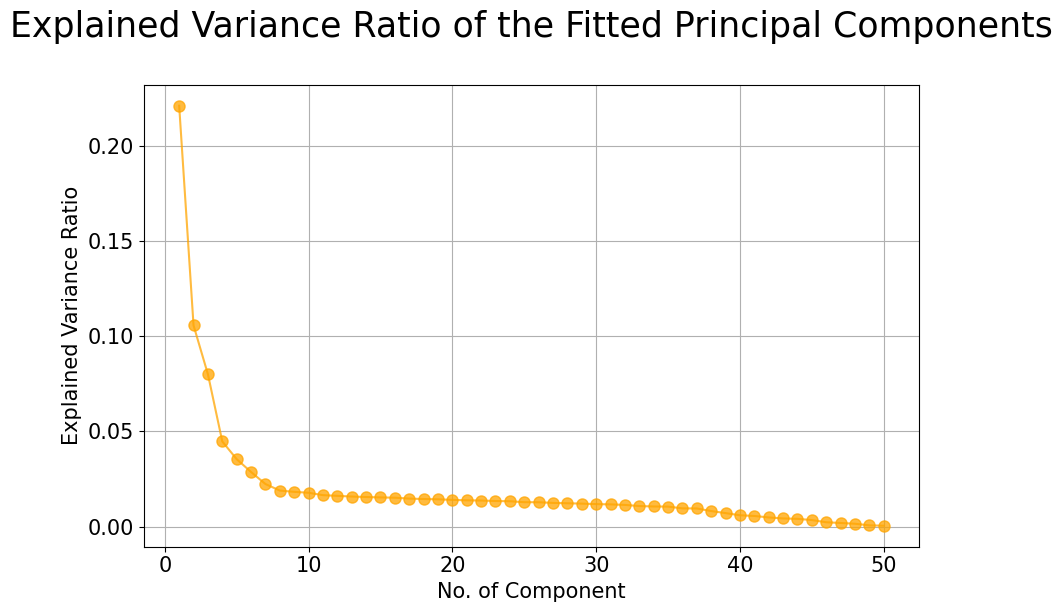


Kitchen Living Room

Transformed DataFrame after PCA:
              RANGE        FP_IDX       FP_AMP1       FP_AMP2       FP_AMP3  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean  -1.436875e-16  8.131767e-15 -5.447494e-17  2.605323e-17  1.531614e-16   
std    1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00   
min   -1.626779e+00 -8.457738e+00 -1.519747e+00 -1.798874e+00 -1.716138e+00   
25%   -8.572987e-01 -3.774302e-01 -8.372484e-01 -9.872270e-01 -9.326461e-01   
50%   -1.394035e-01  7.147581e-02 -1.813139e-01  1.545758e-01  8.142149e-02   
75%    6.472721e-01  5.203818e-01  7.505862e-01  9.394930e-01  8.490292e-01   
max    3.922938e+00  1.735436e+01  2.317489e+00  1.459983e+00  2.001768e+00   

        STDEV_NOISE       CIR_PWR     MAX_NOISE        RXPACC         CIR54  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean  -1.673723e-16 -4.579053e-17  8.842310e-17  9.316005e-17 -1.578984e-17

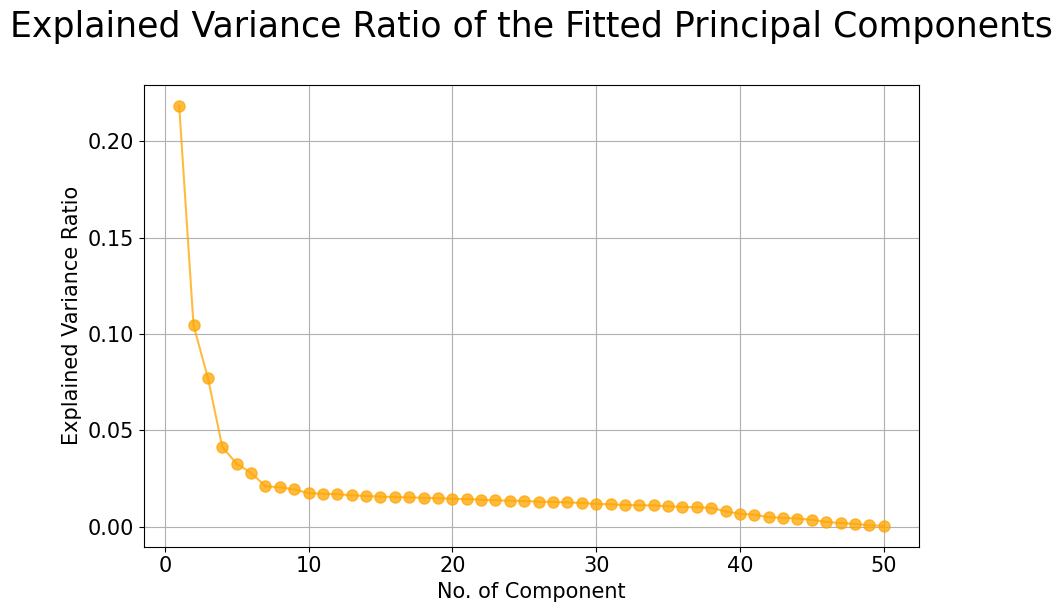


Bedroom

Transformed DataFrame after PCA:
              RANGE        FP_IDX       FP_AMP1       FP_AMP2       FP_AMP3  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean  -3.710612e-17 -7.875971e-15 -3.394815e-17 -1.144763e-16  2.447425e-17   
std    1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00   
min   -1.575830e+00 -7.215559e+00 -1.500534e+00 -1.836446e+00 -1.798578e+00   
25%   -8.496687e-01 -4.105678e-01 -8.412040e-01 -9.671293e-01 -9.359405e-01   
50%   -1.654818e-01  7.550300e-02 -1.791157e-01  1.607907e-01  1.049214e-01   
75%    6.698139e-01  5.615738e-01  7.860198e-01  9.358751e-01  8.375150e-01   
max    1.016448e+01  7.852636e+00  2.280201e+00  1.462122e+00  1.969688e+00   

        STDEV_NOISE       CIR_PWR     MAX_NOISE        RXPACC         CIR30  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean  -2.526374e-17  1.728987e-16 -5.052748e-17 -4.815901e-17  8.368614e-17   
std    1

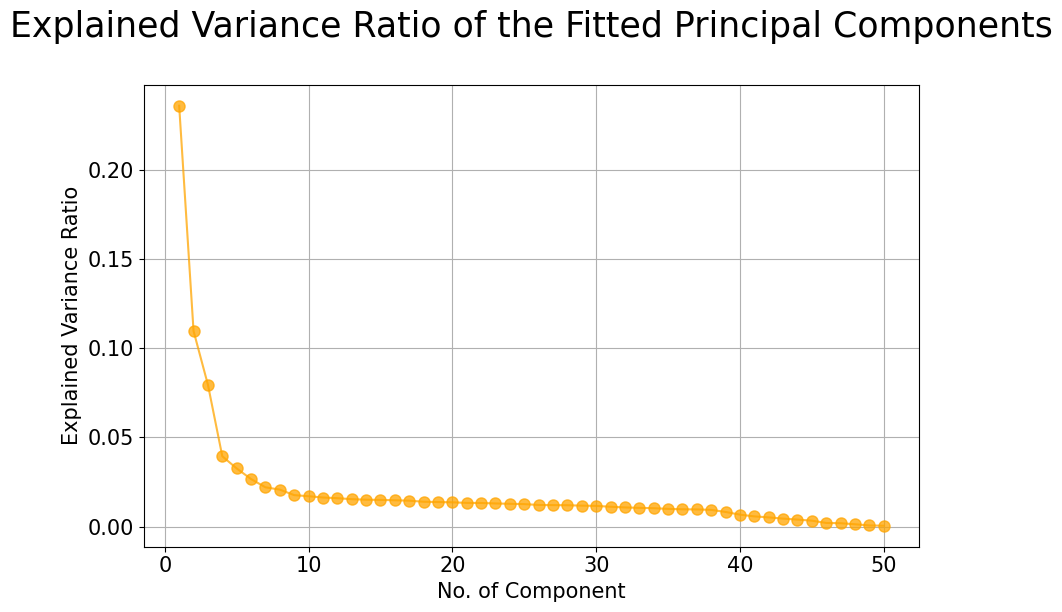


Boiler Room

Transformed DataFrame after PCA:
              RANGE        FP_IDX       FP_AMP1       FP_AMP2       FP_AMP3  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean   1.334241e-16  4.127464e-15 -7.894919e-18  1.421085e-17  1.318452e-16   
std    1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00  1.000111e+00   
min   -1.636301e+00 -7.070521e+00 -1.494115e+00 -1.783394e+00 -1.697191e+00   
25%   -8.665065e-01 -3.666820e-01 -8.430257e-01 -9.837540e-01 -9.363830e-01   
50%   -1.392417e-01  9.565171e-02 -1.808897e-01  1.273066e-01  9.155112e-02   
75%    6.986014e-01  5.579855e-01  7.804956e-01  9.533256e-01  8.473578e-01   
max    3.913877e+00  1.512150e+01  2.315221e+00  1.487648e+00  2.013486e+00   

        STDEV_NOISE       CIR_PWR     MAX_NOISE        RXPACC         CIR54  \
count  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03  4.500000e+03   
mean  -8.723886e-17  4.105358e-17 -1.065814e-16  1.442796e-16  9.158106e-17   
std 

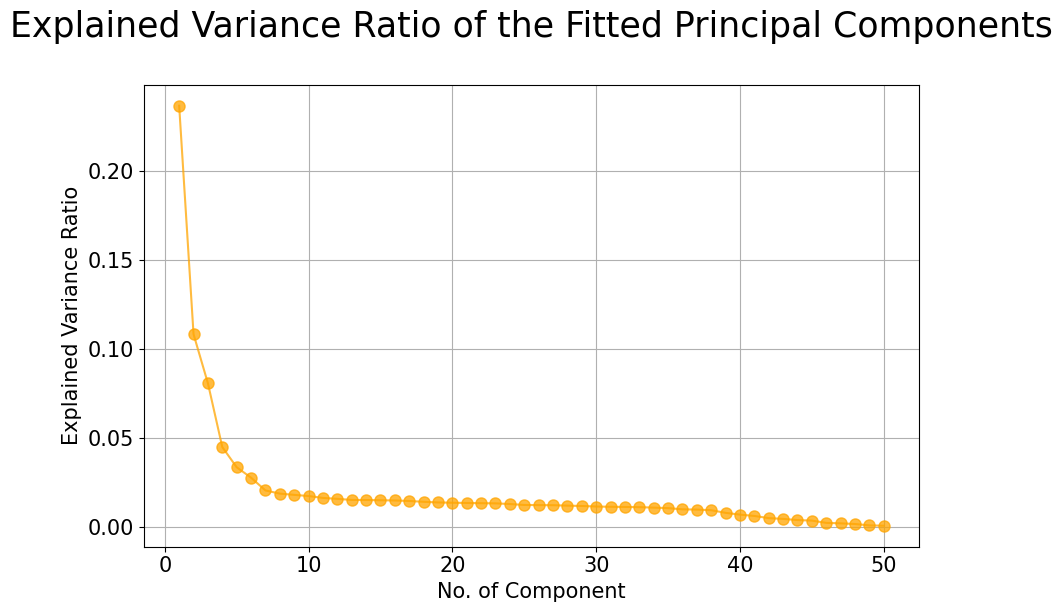

In [17]:
#Standardize the Data
dfx = {}

for idx, each_df in enumerate(df_filtered):
    print(f"\n{dataset_names[idx]}")

    X = each_df.drop('NLOS',axis=1)
    y = each_df['NLOS']

    #Training and Test data Spliting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    #Standardize the Data
    scaler = StandardScaler()
    X_train_scaled  = scaler.fit_transform(X_train)

    #Store standardized data
    dfx[dataset_names[idx]] = pd.DataFrame(data=X_train_scaled ,columns=X.columns)
    
    print("\nTransformed DataFrame after PCA:")
    print(dfx[dataset_names[idx]].describe())

    #Apply PCA
    pca = PCA(n_components=None)
    X_train_pca = pca.fit_transform(X_train_scaled)

    #Plot 
    plt.figure(figsize=(10, 6))
    plt.plot([i+1 for i in range(len(pca.explained_variance_ratio_))],
             pca.explained_variance_ratio_,
             marker='o', linestyle='-', color='orange', markersize=8, alpha=0.75)
    plt.grid(True)
    plt.title("Explained Variance Ratio of the Fitted Principal Components\n", fontsize=25)
    plt.yticks(fontsize=15)
    plt.ylabel("Explained Variance Ratio", fontsize=15)
    plt.xticks(fontsize=15)
    plt.xlabel("No. of Component", fontsize=15)

    plt.show()

    #Find minimum number of components that explain 95% of variance
    # explained_variance = np.cumsum(pca.explained_variance_ratio_)
    # n_components = 

    # 0.001 is added to avoid floating point error
